# 1 读取和展示
准备好几张图片和一段小视频，本小节涉及到对图像和视频的一些简单处理。

## 1.1 图像和视频的读取和展示

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 读取图片
img = cv2.imread("img/cat.jpg")
img

array([[[ 64,  56,  56],
        [ 64,  56,  56],
        [ 64,  56,  56],
        ...,
        [113, 145, 134],
        [113, 145, 134],
        [113, 145, 134]],

       [[ 63,  55,  55],
        [ 63,  55,  55],
        [ 63,  55,  55],
        ...,
        [111, 143, 132],
        [111, 143, 132],
        [111, 143, 132]],

       [[ 61,  56,  55],
        [ 61,  56,  55],
        [ 61,  56,  55],
        ...,
        [104, 138, 127],
        [104, 138, 127],
        [104, 139, 125]],

       ...,

       [[153, 152, 161],
        [151, 150, 159],
        [149, 148, 157],
        ...,
        [138, 140, 151],
        [140, 142, 153],
        [143, 145, 156]],

       [[161, 160, 169],
        [158, 157, 166],
        [156, 155, 164],
        ...,
        [126, 126, 138],
        [129, 129, 141],
        [131, 131, 143]],

       [[155, 154, 163],
        [152, 151, 160],
        [149, 148, 157],
        ...,
        [123, 123, 135],
        [125, 125, 137],
        [128, 128, 140]]

In [13]:
def cv2_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()




In [9]:
# 图像大小
cv2_show("catimg",img)
img.shape

(280, 459, 3)

In [16]:
# 灰度图
img_gray = cv2.imread("img/cat.jpg",cv2.IMREAD_GRAYSCALE)

cv2_show("IMG_GRAY",img_gray)

In [22]:
# 读取视频
vc = cv2.VideoCapture("video/test.mp4")

while open:
    ret,frame = vc.read()
    if frame is None:
        break
    if ret==True:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow("result",gray)
        if cv2.waitKey(40) & 0XFF==27:
            break

vc.release()
cv2.destroyAllWindows()

In [24]:
# 截取部分图像数据
img = cv2.imread("img/dog.jpg")
dog = img[0:200,0:200]
cv2_show("dog",dog)

## 1.2颜色通道提取

In [49]:
# 颜色通道提取
b,g,r = cv2.split(img)
bimg = img.copy()
bimg[:,:,0] = 0
bimg[:,:,1] = 0

cv2_show("R",bimg)
# 保存图像
cv2.imwrite("output_img/bimg.jpg",bimg)

True

## 1.3 边界填充
扩大图像
在计算机视觉和图像处理中，边界填充（border padding）是指在图像的边缘周围添加额外的像素值。
避免边界信息丢失   避免图像尺寸变化  避免边缘效应

(<Axes: title={'center': 'constant'}>,
 Text(0.5, 1.0, 'constant'))

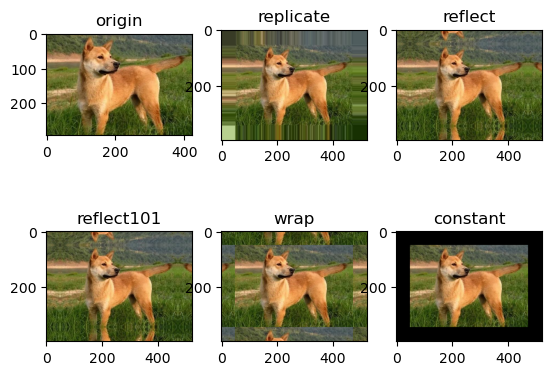

In [32]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
top,bot,lft,rgt = (50,50,50,50)

# 复制边缘信息
replicate = cv2.copyMakeBorder(img,top,bot,lft,rgt,borderType=cv2.BORDER_REPLICATE)
# 反射边缘信息 镜子带边框
reflect = cv2.copyMakeBorder(img,top,bot,lft,rgt,borderType=cv2.BORDER_REFLECT)
# 反射边缘信息 镜子不带边框
reflect101 = cv2.copyMakeBorder(img,top,bot,lft,rgt,borderType=cv2.BORDER_REFLECT_101)
# 外包法   cde | abcde | abc
wrap = cv2.copyMakeBorder(img,top,bot,lft,rgt,borderType=cv2.BORDER_WRAP)
# 常数，比如 0 全黑
constant = cv2.copyMakeBorder(img,top,bot,lft,rgt,borderType=cv2.BORDER_CONSTANT,value=0)


plt.subplot(231),plt.imshow(img,"gray"),plt.title("origin")
plt.subplot(232),plt.imshow(replicate,"gray"),plt.title("replicate")
plt.subplot(233),plt.imshow(reflect,"gray"),plt.title("reflect")
plt.subplot(234),plt.imshow(reflect101,"gray"),plt.title("reflect101")
plt.subplot(235),plt.imshow(wrap,"gray"),plt.title("wrap")
plt.subplot(236),plt.imshow(constant,"gray"),plt.title("constant")

# 2 数值操作

## 2.1 加减操作


In [39]:
# 数值加减
img_cat = cv2.imread("img/cat.jpg")
img_dog = cv2.imread("img/dog.jpg")

img_cat10 = img_cat+10
#cv2_show("imgcat10",img_cat10)


# 图像相加
# 先变换到同一纬度
# 直接相加是%255
# 使用add函数，超过255的就是255，其余正常加
img_cat2 = img_cat+img_cat
cv2_show("img_cat2",img_cat2)




## 2.2 图像融合

In [58]:

h1, w1 = img_cat.shape[:2]
h2, w2 = img_dog.shape[:2]

# 找到最小的高度和宽度
min_height = min(h1, h2)
min_width = min(w1, w2)

resized_cat = cv2.resize(img_cat, (min_width, min_height))
resized_dog = cv2.resize(img_dog, (min_width, min_height))

img_ani = cv2.addWeighted(resized_cat,0.4,resized_dog,0.6,0)

cv2_show("img_ani",img_ani)

## 2.3 拉伸图像

In [57]:
# fx拉伸为3倍 ，fy拉伸为1倍
img_dog_la = cv2.resize(img,(0,0),fx=3,fy=1)
img_dog_la = cv2.cvtColor(img_dog_la,cv2.COLOR_BGR2RGB)
cv2_show("img_dog_la",img_dog_la)

## 2.4 阈值操作

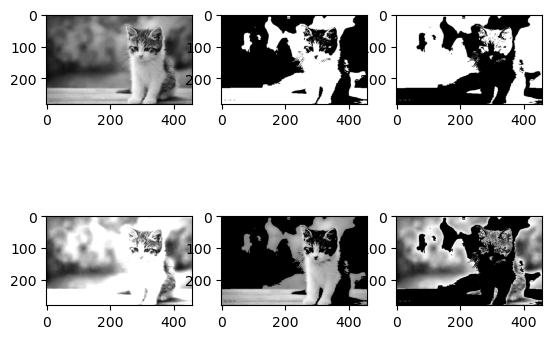

In [69]:
gray_cat = cv2.imread("img/cat.jpg",cv2.IMREAD_GRAYSCALE)
# 大于阈值 则 255  否则0 
ret,thresh1 = cv2.threshold(gray_cat,127,255,cv2.THRESH_BINARY)
# 大于阈值 则 0  否则255
ret,thresh2 = cv2.threshold(gray_cat,127,255,cv2.THRESH_BINARY_INV)
# 大于阈值 设置为阈值  否则原值
ret,thresh3 = cv2.threshold(gray_cat,127,255,cv2.THRESH_TRUNC)

# 大于阈值 设置原值  否则0
ret,thresh4 = cv2.threshold(gray_cat,127,255,cv2.THRESH_TOZERO)
# 大于阈值 设置0  否则原值
ret,thresh5 = cv2.threshold(gray_cat,127,255,cv2.THRESH_TOZERO_INV)

imgs = [gray_cat,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(len(imgs)):
    plt.subplot(2,3,i+1),plt.imshow(imgs[i],"gray")
plt.show()

# 3 滤波操作
滤波说白了感觉像图片模糊处理一样，确定一个点的像素值，取决于周围的像素点，所以会使得图像变得模糊，但是同时会去除一些极端的数据，使得噪音的影响变得更少。接下来的照片lenaNoise，就在照片中添加了很多白噪声，应用均值滤波，高斯滤波和中值滤波来对其进行处理。滤波操作可以是看作是来处理噪声点的。


## 3.1 图像平滑

In [8]:
# 均值滤波
img = cv2.imread("img/lenaNoise.png")
cv2_show("leaner_noisy",img)



In [10]:
# blur的意思也就是变得模糊不清
blur = cv2.blur(img,(3,3))
cv2_show("blur",blur)

In [13]:
# 高斯滤波
guss = cv2.GaussianBlur(img,(5,5),1)
cv2_show("guss",guss)

In [18]:
# 中值滤波
# 中值滤波在面对这些极端噪音点时非常有效
median = cv2.medianBlur(img,3)
cv2_show("median",median)

## 3.2 腐蚀操作
就是暗位面向亮位面的侵蚀。
去除尖刺效果比较好

In [20]:
img = cv2.imread("img/dige.png")
cv2_show("dige",img)

In [24]:
# 使用核函数，核矩阵，核矩阵越大，腐蚀越快
kernel = np.ones((3,3),np.uint8) 
# iterations 是迭代次数， 迭代次数越高，腐蚀越大。
dige_fushi = cv2.erode(img,kernel,iterations = 1)
cv2_show("digefushi",dige_fushi)



## 3.3 膨胀操作
扩张，腐蚀操作的逆操作。

In [27]:
dige_pengzhang = cv2.dilate(dige_fushi,kernel,iterations=1)
cv2_show("digepengzhang",dige_pengzhang)

## 3.4 开运算和闭运算

In [30]:
# 开运算 先腐蚀再膨胀
# 去除尖刺
kai_dige = cv2.morphologyEx(img,cv2.MORPH_OPEN,iterations=1,kernel=kernel)
cv2_show("kaidige",kai_dige)
# 闭运算 先膨胀再腐蚀
# 感觉几把没啥变化
bi_dige = cv2.morphologyEx(img,cv2.MORPH_CLOSE,iterations=1,kernel=kernel)
cv2_show("kaidige",bi_dige)

## 3.5 梯度运算


In [35]:
# 梯度=膨胀-腐蚀
# 这里的梯度和原本的梯度不太一样，但是感觉原理是不差啥的，膨胀减去腐蚀，其实得到的就是边框，感觉是不是。
pie = cv2.imread('img/pie.png')
kernel = np.ones((7,7),np.uint8) 
dilate = cv2.dilate(pie,kernel,iterations = 5)
erosion = cv2.erode(pie,kernel,iterations = 5)
res = np.hstack((dilate,erosion))

gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)
cv2_show("gradient",gradient)



## 3.6 礼帽和黑帽

In [37]:
# 礼帽 原始输入-开运算的结果  也就是尖刺，像高高的礼帽

img = cv2.imread("img/dige.png")
limao = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel=kernel)
cv2_show("limao",limao)

In [38]:

# 黑帽 原始输入-闭运算的结果  因为收到膨胀，所以可能比原来大，产生大一点的亮点，像黑帽。
heimao = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel=kernel)
cv2_show("heimao",heimao)

# 4 图像梯度
梯度就是变化最快的地方，图像的梯度就像边界一样，对吧。

## 4.1 Sobel算子
算子，也可以说是核函数，kernel，不同的算子有不同的作用。
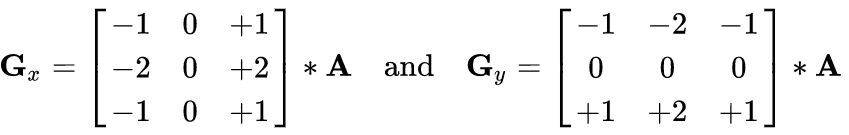

In [43]:
# 算子是有方向性的。
# 1,0 表示在x轴方向上
img = cv2.imread("img/pie.png")
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
cv2_show("sobelx",sobelx)

In [44]:
# 0,1 表示在y轴方向上
img = cv2.imread("img/pie.png")
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
cv2_show("sobelx",sobely)

In [45]:
# 常见的想法可能是使用1，1
# 但实际上，使用1，1描述的轮廓可能不好。
sobelxy = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy)
cv2_show("sobelx",sobelxy)

In [47]:
# 比较建议的做法是，使用x和y后进行拼接
sobelxy1 = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv2_show("sobelxy1",sobelxy1)

## 4.2 scharr算子和laplacian算子
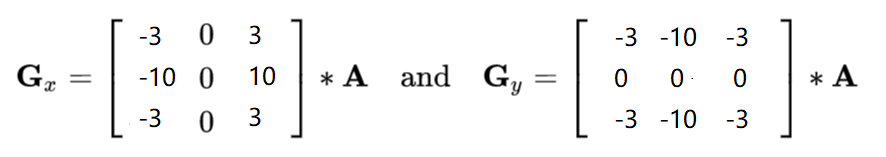<br>
拉普拉斯算子<br>
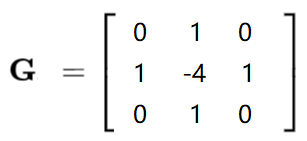

In [52]:
# 主要是各种算子之间的差异。
img = cv2.imread("img/lena.jpg",cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy1 = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)


# scharr固定大小是3*3
scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx,0.5,scharry,0.5,0)



# 拉普拉斯算子
laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)   

res = np.hstack((sobelxy1,scharrxy,laplacian))
cv2_show("merge",res)

## 4.3 Caany边缘检测
使用更加严格的配合对其进行限制，来选择出比较合适的边界。<br>
- 1)        使用高斯滤波器，以平滑图像，滤除噪声。

- 2)        计算图像中每个像素点的梯度强度和方向。

- 3)        应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应。

- 4)        应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘。

- 5)        通过抑制孤立的弱边缘最终完成边缘检测。





高斯滤波器：<br>
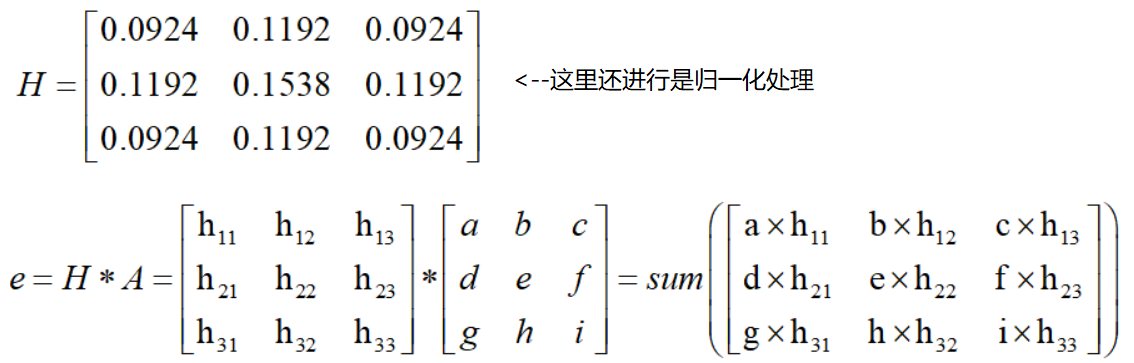

梯度和方向<br>
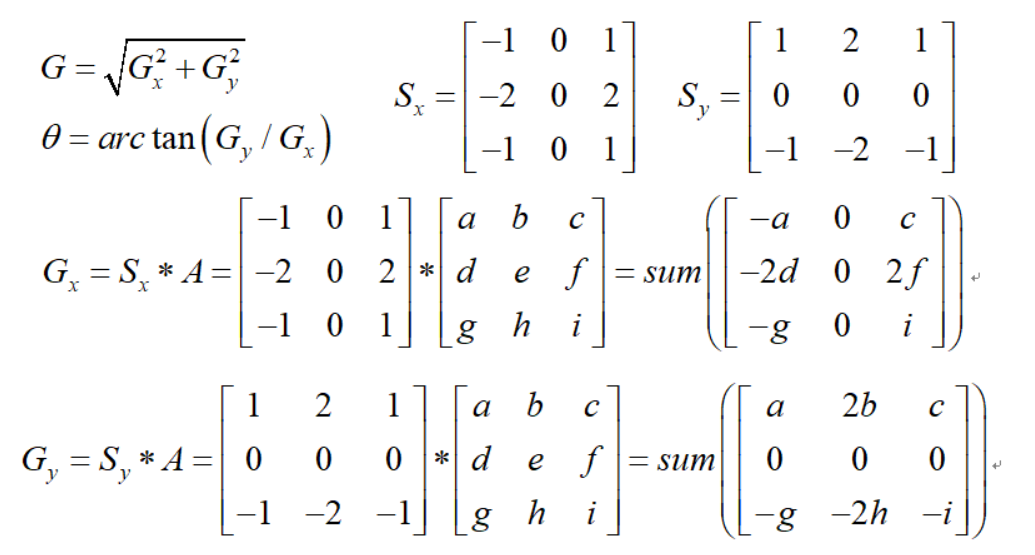

非极大值抑制<br>
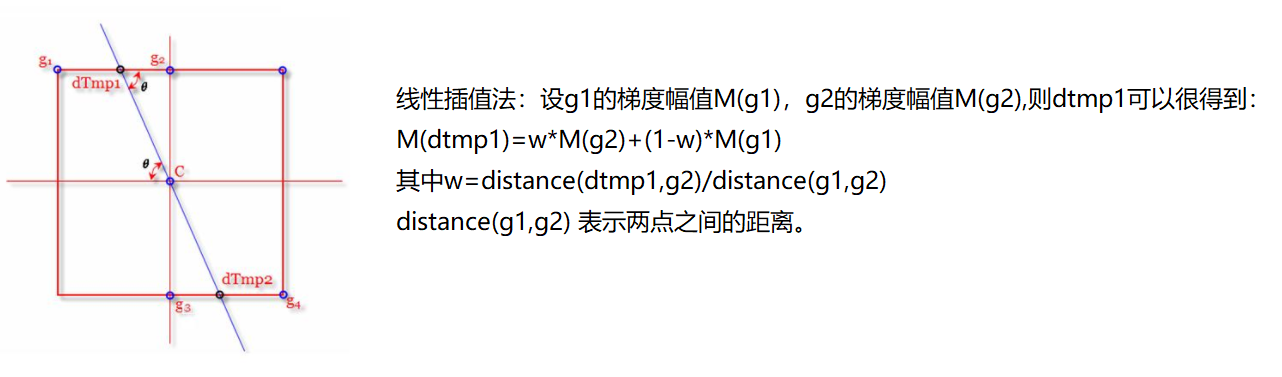
<br>
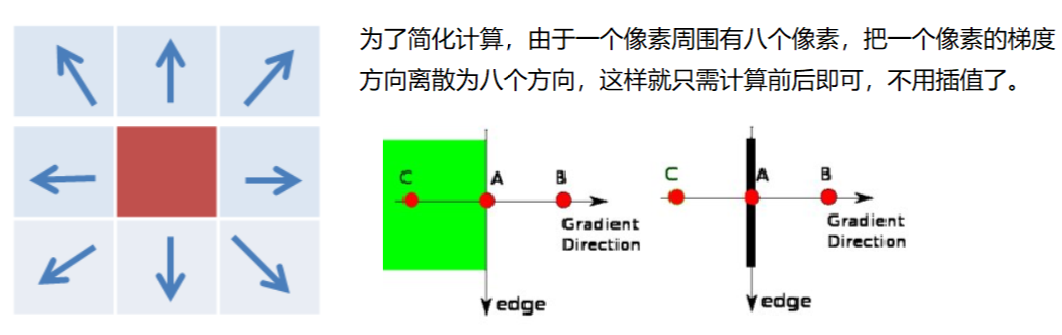

双阈值检测<br>
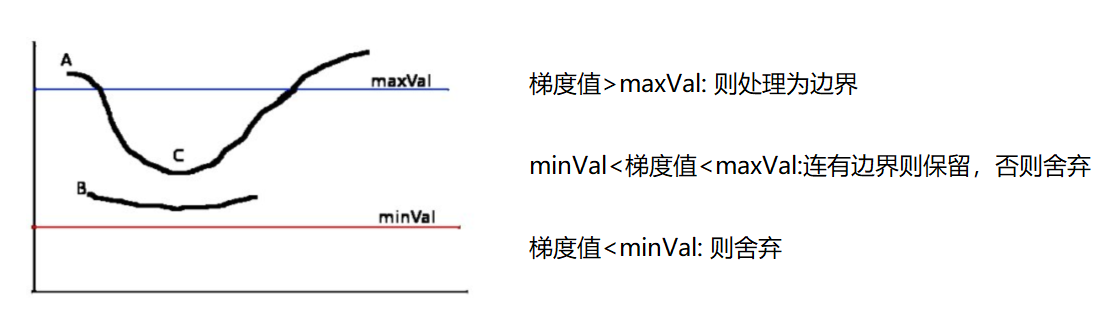

In [54]:
img = cv2.imread("img/lena.jpg",cv2.IMREAD_GRAYSCALE)

v1 = cv2.Canny(img,120,250)
v2 = cv2.Canny(img,80,150)
res = np.hstack((v1,v2))
cv2_show("res",res)

In [56]:
img = cv2.imread("img/car.png",cv2.IMREAD_GRAYSCALE)

v1 = cv2.Canny(img,120,250)
v2 = cv2.Canny(img,80,150)
res = np.hstack((v1,v2))
cv2_show("res",res)

## 4.4 图像金字塔
主要有高斯金字塔和拉普拉斯金字塔
分为向上采样和向下采样.向上采样是扩充,向下采样是缩小.
向下采样会丢失数据,向上采样会失真.

In [67]:
img = cv2.imread("img/AM.png")
cv2_show("am",img)
print(img.shape)

(442, 340, 3)


In [58]:
up = cv2.pyrUp(img)
cv2_show("up",up)
print(up.shape)

(884, 680, 3)


In [59]:
down = cv2.pyrDown(img)
cv2_show("down",down)
print(down.shape)

(221, 170, 3)


In [68]:
up_down = cv2.pyrDown(up)
cv2_show("up_down",up_down)
res = np.hstack((img,up_down))
cv2_show("res",res)
print(up_down.shape)

(442, 340, 3)


In [66]:
down_up = cv2.pyrUp(down)
cv2_show("down_up",down_up)
print(down_up.shape)

(442, 340, 3)


In [70]:
# 拉普拉斯金字塔
lap = img - (down_up)
cv2_show("lap",lap)

## 4.5 轮廓检测
mode:轮廓检索模式
- RETR_EXTERNAL ：只检索最外面的轮廓；
- RETR_LIST：检索所有的轮廓，并将其保存到一条链表当中；
- RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界;
- RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次;

method:轮廓逼近方法
- CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，所有其他方法输出多边形（顶点的序列）。
- CHAIN_APPROX_SIMPLE:压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分。

In [72]:
img = cv2.imread("img/contours.png",cv2.IMREAD_GRAYSCALE)
cv2_show("cou",img)

In [74]:
# 大于阈值则 0 否则255
#cv2.RETR_TREE: 轮廓检测模式，表示检测所有轮廓并构建完整的轮廓层次结构。
#cv2.CHAIN_APPROX_NONE: 轮廓近似方法，表示保存所有的轮廓点。如果需要节省内存，可以选择其他的近似方法。
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
cv2_show("thresh",thresh)


In [78]:
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)



In [79]:
draw_img = thresh.copy()
# 2表示轮廓的宽度
res = cv2.drawContours(draw_img,contours,-1,(0,0,255),2)
cv2_show("res",res)

In [81]:
# 轮廓的特征
cnt = contours[0]
print(cv2.contourArea(cnt))
print(cv2.arcLength(cnt,True))

8500.5
437.9482651948929


In [107]:
# 轮廓的近似
# 有些轮廓的曲线很多，考虑使用直线近似，拉格朗日中点法
img = cv2.imread('img/contours2.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 255), 2)
cv2_show('res',res)

In [108]:
epsilon = 0.1 * cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

draw_img = img.copy()
res = cv2.drawContours(draw_img,[approx],-1,(0,0,255),2)
cv2_show("good",res)

In [110]:
# 边界矩形
img = cv2.imread('img/contours2.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
area1 = w * h
extent = float(area)/area1
print(extent)

0.7800798598378357


In [111]:
# 外接圆
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,0,255),2)
cv2_show("img",img)

# 5 模板匹配
模板匹配和卷积很像，模板在原图像上从原点开始华东，计算模板与被覆盖的图像的差别，每次的计算结果作为输出,放到一个矩阵中。
<br>
TM_SQDIFF: 计算平方不同，值越小，越相关<br>
TM_CCORR: 计算相关性，值越大，越相关<br>
TM_CCOEFF: 计算相关系数，值越大，越相关<br>
TM_SQDIFF_NORMED: 计算归一化平方不同，越接近于0，越相关<br>
TM_CCORR_NORMED: 计算归一化相关性，越接近于1，越相关<br>
TM_CCOEFF_NORMED: 计算归一化系数，越接近于1，越相关。<br>
推荐使用归一化方法。<br>最后的效果是找到lina的脸。<br>


In [112]:
img = cv2.imread("img/lena.jpg",0)
face = cv2.imread("img/face.jpg",0)

h,w = face.shape[:2]
h,w


(110, 85)

In [113]:
img.shape

(263, 263)

In [114]:
methods = ["cv2.TM_SQDIFF","cv2.TM_CCORR","cv2.TM_CCOEFF","cv2.TM_SQDIFF_NORMED","cv2.TM_CCORR_NORMED","cv2.TM_CCOEFF_NORMED"]
res = cv2.matchTemplate(img,face,1)
res.shape

(154, 179)

In [ ]:
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

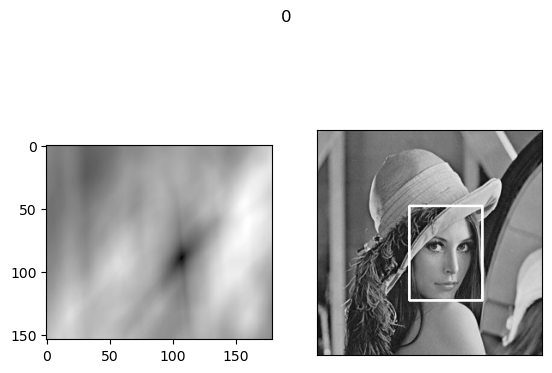

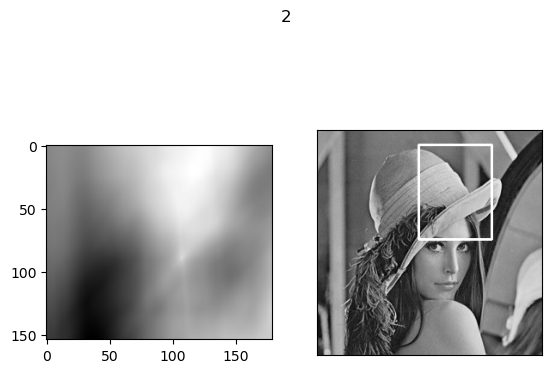

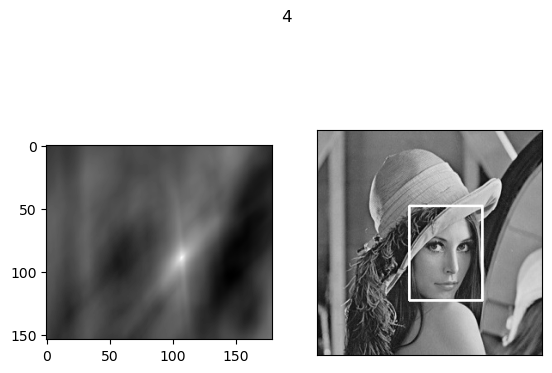

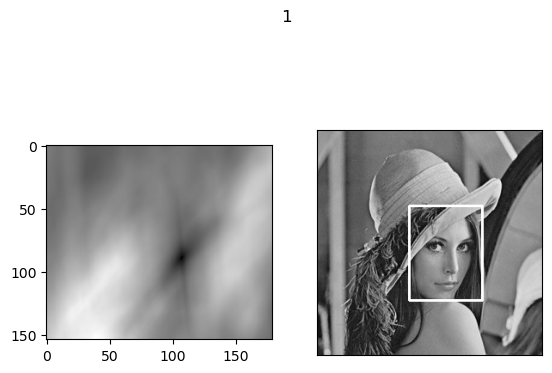

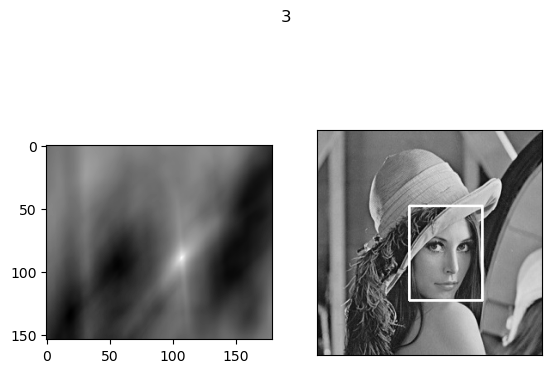

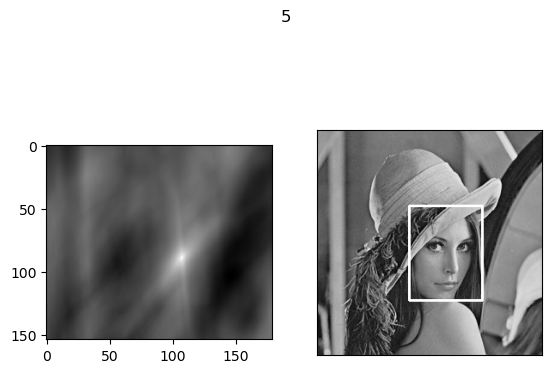

In [115]:
for method in methods:
    img2 = img.copy()

    method = eval(method)
    
    res = cv2.matchTemplate(img,face,method)

    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left=max_loc
    bottem_right = (top_left[0]+w,top_left[1]+h)
    cv2.rectangle(img2,top_left,bottem_right,255,2)

    plt.subplot(121),plt.imshow(res,cmap="gray")
    plt.xticks(),plt.yticks()
    plt.subplot(122),plt.imshow(img2,cmap="gray")
    plt.xticks([]),plt.yticks([])
    plt.suptitle(method)
    plt.show()



In [139]:
# 找到多个特征：

img_rbg = cv2.imread("img/mario.jpg")

img_gray = cv2.cvtColor(img_rbg,cv2.COLOR_BGR2GRAY)
face = cv2.imread("img/mario_coin.jpg",0)

h,w = face.shape[:2]

res = cv2.matchTemplate(img_gray,face,cv2.TM_CCOEFF_NORMED)
thershod = 0.8
loc = np.where(res>=thershod)

for pt in zip(*loc[::-1]):
    bottom_right1 = (pt[0]+w,pt[1]+h)
    cv2.rectangle(img_rbg,pt,bottom_right1,(0,0,255),1)


cv2_show("img",img_rbg)


# 6 均衡化和傅里叶变换滤波

## 6.1 直方图

In [8]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('img/cat.jpg',0) #0表示灰度图
hist = cv2.calcHist([img],[0],None,[256],[0,256])


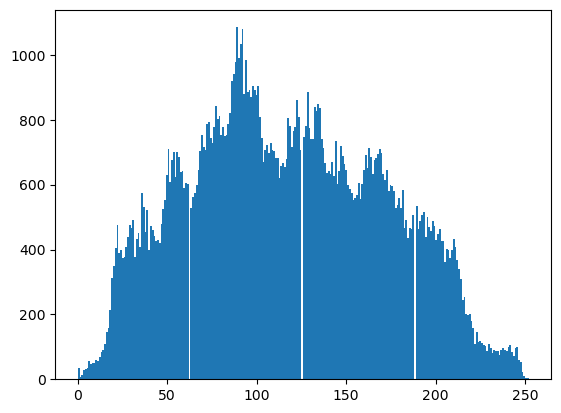

In [9]:
plt.hist(img.ravel(),256)
plt.show()

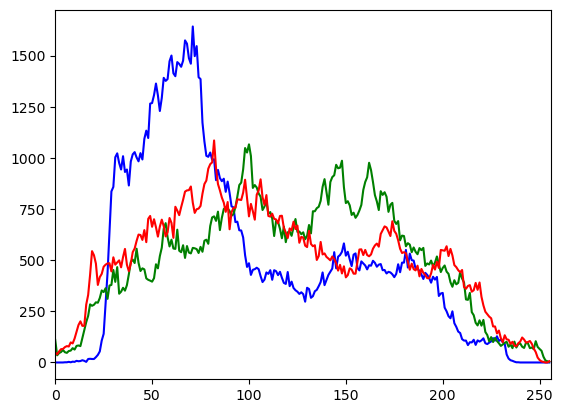

In [10]:
img = cv2.imread('img/cat.jpg') 
color = ('b','g','r')
for i,col in enumerate(color): 
    histr = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.plot(histr,color = col) 
    plt.xlim([0,256]) 
plt.show()

In [33]:
# mask 操作
# 蒙版操作
import numpy as np
mask = np.zeros(img.shape[:2],np.uint8)

mask[50:250,150:350] =255
cv2_show("mask",mask)

In [34]:
img = cv2.imread("img/cat.jpg",0)
masked_img = cv2.bitwise_and(img,img,mask=mask)
cv2_show("mask",masked_img)

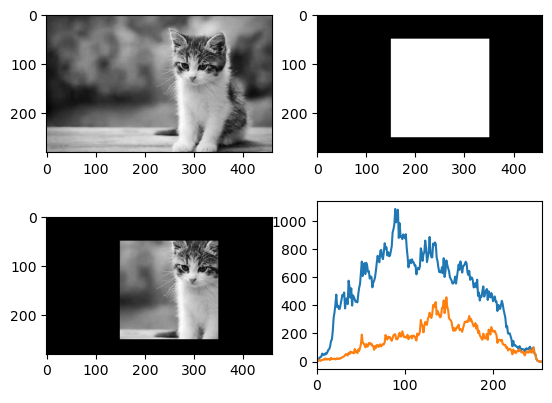

In [35]:
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

## 6.2 均衡化
均衡化会使得图像的对比度变高。

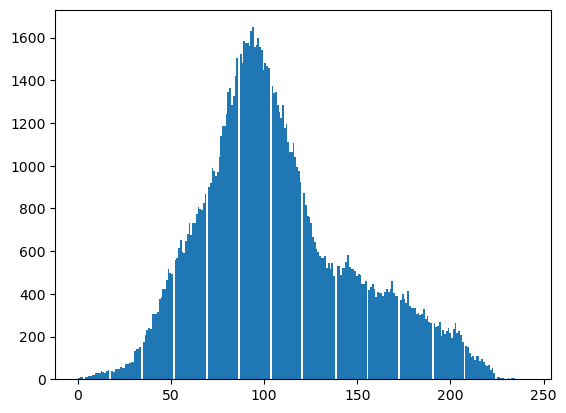

In [43]:
img = cv2.imread("img/dog.jpg",0)
plt.hist(img.ravel(),256); 
plt.show()

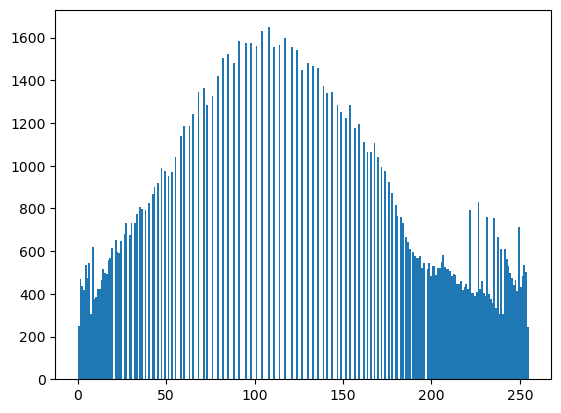

In [44]:
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(),256)
plt.show()

In [45]:
res = np.hstack((img,equ))
cv2_show("res",res)

In [46]:
#全局均衡会使得有些细节缺失，采用分块均衡
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
res = clahe.apply(img)
res = np.hstack((img,equ,res))
cv2_show("res",res)

In [47]:
# 彩色图均衡化
import cv2
import numpy as np

# 读取彩色图像
img = cv2.imread('img/dog.jpg')

# 将图像转换为Lab色彩空间
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

# 分离L、a、b通道
l_channel, a_channel, b_channel = cv2.split(lab_img)

# 创建CLAHE对象，仅对L通道进行均衡化
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_l_channel = clahe.apply(l_channel)

# 合并处理后的L通道和原始的a、b通道
enhanced_lab_img = cv2.merge([enhanced_l_channel, a_channel, b_channel])

# 将图像转回BGR色彩空间
enhanced_img = cv2.cvtColor(enhanced_lab_img, cv2.COLOR_Lab2BGR)

# 显示原始图像和增强后的图像
res = np.hstack((img,enhanced_img))
cv2_show("res",res)

## 6.3 傅里叶频域变化
傅里叶变换的作用

- 高频：变化剧烈的灰度分量，例如边界

- 低频：变化缓慢的灰度分量，例如一片大海

滤波

- 低通滤波器：只保留低频，会使得图像模糊

- 高通滤波器：只保留高频，会使得图像细节增强
<br>
opencv中主要就是cv2.dft()和cv2.idft()，输入图像需要先转换成np.float32 格式，得到的结果中频率为0的部分会在左上角，通常要转换到中心位置，通过shift变换

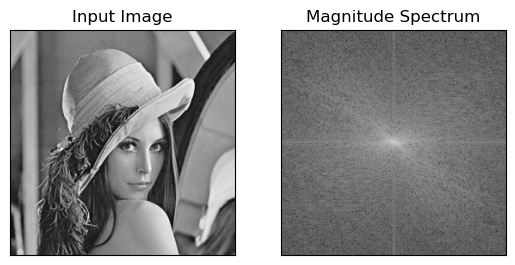

In [49]:
img = cv2.imread("img/lena.jpg",0)

img_float32 = np.float32(img)
#用于进行离散傅里叶变换（DFT）
dft = cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
#将傅里叶变换的结果进行频率中心化
dft_shift = np.fft.fftshift(dft)
#用于计算复数数组的幅度
#这样做是为了将幅度谱的数值范围映射到更合适的范围，便于可视化和分析。
magni_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magni_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

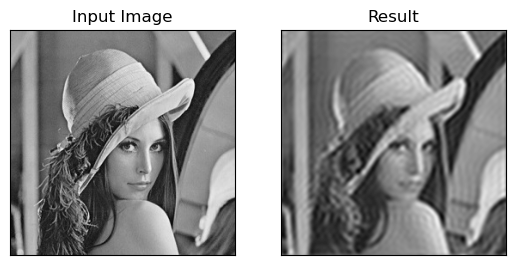

In [51]:
# 低通滤波

img = cv2.imread("img/lena.jpg",0)
img_fl32 = np.float32(img)
#flags=cv2.DFT_COMPLEX_OUTPUT表示输出结果是一个复数数组。
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()   



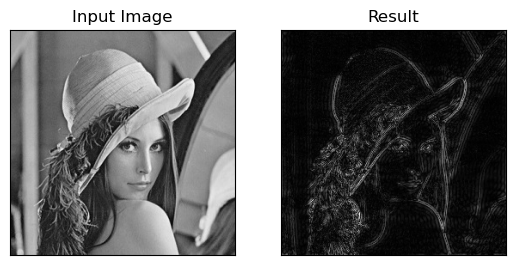

In [52]:
# 高通滤波
# 低通滤波

img = cv2.imread("img/lena.jpg",0)
img_fl32 = np.float32(img)
#flags=cv2.DFT_COMPLEX_OUTPUT表示输出结果是一个复数数组。
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0
# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()   

